In [51]:
from pyspark.sql import SparkSession
import numpy as np
import findspark
findspark.init() 
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr, sum
from pyspark.sql.functions import to_date, year
import matplotlib.pyplot as plt

In [52]:
spark = SparkSession.builder.appName('Kecelakaan Motor NYC').getOrCreate()
data = "/home/hanif/Downloads/datasets/Motor_Vehicle_Collisions_-_Crashes.csv"

# Load dataset
df = spark.read.csv(data, header=True, inferSchema=True)

# Tampilkan info dataset
print('Dataset Kecelakaan (10 Teratas)')
df.show(10)

print('\nSchema Dataset')
df.printSchema()

print("\nJumlah Data (rows):", df.count())
print("Jumlah Kolom:", len(df.columns))

Dataset Kecelakaan (10 Teratas)
+----------+----------+---------+--------+---------+----------+--------------------+--------------------+-----------------+--------------------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+------------+-------------------+--------------------+-------------------+-------------------+-------------------+
|CRASH DATE|CRASH TIME|  BOROUGH|ZIP CODE| LATITUDE| LONGITUDE|            LOCATION|      ON STREET NAME|CROSS STREET NAME|     OFF STREET NAME|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|NUMBER OF MOTORIST INJURED|NUMBER OF MOT

In [53]:
# Missing values per kolom
print("\nMissing Values per Kolom:")
for c in df.columns:
    missing = df.filter(col(c).isNull()).count()
    print(f"{c}: {missing}")

# Mengecek kolom duplikat
duplicate_count = df.count() - df.dropDuplicates().count()
print("\nTotal Duplicate Rows:", duplicate_count)


Missing Values per Kolom:


CRASH DATE: 0


CRASH TIME: 0


BOROUGH: 625474


ZIP CODE: 625712


LATITUDE: 229136


LONGITUDE: 229136


LOCATION: 229136


ON STREET NAME: 422563


CROSS STREET NAME: 751506


OFF STREET NAME: 1680334


NUMBER OF PERSONS INJURED: 19


NUMBER OF PERSONS KILLED: 33


NUMBER OF PEDESTRIANS INJURED: 2


NUMBER OF PEDESTRIANS KILLED: 2


NUMBER OF CYCLIST INJURED: 1


NUMBER OF CYCLIST KILLED: 1


NUMBER OF MOTORIST INJURED: 1


NUMBER OF MOTORIST KILLED: 2


CONTRIBUTING FACTOR VEHICLE 1: 6304


CONTRIBUTING FACTOR VEHICLE 2: 306222


CONTRIBUTING FACTOR VEHICLE 3: 1868131


CONTRIBUTING FACTOR VEHICLE 4: 1978598


CONTRIBUTING FACTOR VEHICLE 5: 2001909


COLLISION_ID: 2


VEHICLE TYPE CODE 1: 12561


VEHICLE TYPE CODE 2: 374471


VEHICLE TYPE CODE 3: 1873066


VEHICLE TYPE CODE 4: 1979664


VEHICLE TYPE CODE 5: 2002164


[Stage 1137:==============================================>         (5 + 1) / 6]


Total Duplicate Rows: 0


In [54]:
cols_drop = [
    "OFF STREET NAME",
    "VEHICLE TYPE CODE 4",
    "VEHICLE TYPE CODE 5",
    "CONTRIBUTING FACTOR VEHICLE 4",
    "CONTRIBUTING FACTOR VEHICLE 5",
    "VEHICLE TYPE CODE 3",
    "CONTRIBUTING FACTOR VEHICLE 3"
]

df = df.drop(*cols_drop)

# Missing values per kolom
for c in df.columns:
    missing = df.filter(col(c).isNull()).count()
    print(f"{c}: {missing}")

CRASH DATE: 0


CRASH TIME: 0


BOROUGH: 625474


ZIP CODE: 625712


LATITUDE: 229136


LONGITUDE: 229136


LOCATION: 229136


ON STREET NAME: 422563


CROSS STREET NAME: 751506


NUMBER OF PERSONS INJURED: 19


NUMBER OF PERSONS KILLED: 33


NUMBER OF PEDESTRIANS INJURED: 2


NUMBER OF PEDESTRIANS KILLED: 2


NUMBER OF CYCLIST INJURED: 1


NUMBER OF CYCLIST KILLED: 1


NUMBER OF MOTORIST INJURED: 1


NUMBER OF MOTORIST KILLED: 2


CONTRIBUTING FACTOR VEHICLE 1: 6304


CONTRIBUTING FACTOR VEHICLE 2: 306222


COLLISION_ID: 2


VEHICLE TYPE CODE 1: 12561
VEHICLE TYPE CODE 2: 374471


In [55]:
df = df.filter(df.LATITUDE.isNotNull() & df.LONGITUDE.isNotNull())

# Missing values per kolom
print("\nMissing Values per Kolom:")
for c in df.columns:
    missing = df.filter(col(c).isNull()).count()
    print(f"{c}: {missing}")

print("\nJumlah Data (rows):", df.count())


Missing Values per Kolom:


CRASH DATE: 0


CRASH TIME: 0


BOROUGH: 432553


ZIP CODE: 432768


LATITUDE: 0


LONGITUDE: 0


LOCATION: 0


ON STREET NAME: 366855


CROSS STREET NAME: 661358


NUMBER OF PERSONS INJURED: 17


NUMBER OF PERSONS KILLED: 30


NUMBER OF PEDESTRIANS INJURED: 2


NUMBER OF PEDESTRIANS KILLED: 2


NUMBER OF CYCLIST INJURED: 1


NUMBER OF CYCLIST KILLED: 1


NUMBER OF MOTORIST INJURED: 1


NUMBER OF MOTORIST KILLED: 2


CONTRIBUTING FACTOR VEHICLE 1: 5718


CONTRIBUTING FACTOR VEHICLE 2: 276709


COLLISION_ID: 2


VEHICLE TYPE CODE 1: 11438


VEHICLE TYPE CODE 2: 341155


[Stage 1273:>                                                       (0 + 4) / 4]


Jumlah Data (rows): 1781391


In [56]:
df = df.fillna({
    # String columns can be filled with strings
    "ON STREET NAME": "UNKNOWN",
    "CROSS STREET NAME": "UNKNOWN",
    "BOROUGH": "UNKNOWN",
    "ZIP CODE": "UNKNOWN",
    
    # Numeric columns should be filled with numbers (using 0 or -1 as placeholder)
    "NUMBER OF PERSONS INJURED": 0,                                                                            
    "NUMBER OF PERSONS KILLED": 0,                                                                              
    "NUMBER OF PEDESTRIANS INJURED": 0,
    "NUMBER OF PEDESTRIANS KILLED": 0,
    "NUMBER OF CYCLIST INJURED": 0,
    "NUMBER OF CYCLIST KILLED": 0,
    "NUMBER OF MOTORIST INJURED": 0,
    "NUMBER OF MOTORIST KILLED": 0,
    
    # String columns can be filled with strings
    "VEHICLE TYPE CODE 1": "Unspecified",
    "VEHICLE TYPE CODE 2": "Unspecified",
    "CONTRIBUTING FACTOR VEHICLE 1": "Unspecified",                                                                              
    "CONTRIBUTING FACTOR VEHICLE 2": "Unspecified"
})

# Missing values per kolom
print("\nMissing Values per Kolom:")
for c in df.columns:
    missing = df.filter(col(c).isNull()).count()
    print(f"{c}: {missing}")

print("\nJumlah Data (rows):", df.count())


Missing Values per Kolom:


CRASH DATE: 0


CRASH TIME: 0
BOROUGH: 0
ZIP CODE: 0


LATITUDE: 0


LONGITUDE: 0


LOCATION: 0
ON STREET NAME: 0
CROSS STREET NAME: 0
NUMBER OF PERSONS INJURED: 0
NUMBER OF PERSONS KILLED: 0
NUMBER OF PEDESTRIANS INJURED: 0
NUMBER OF PEDESTRIANS KILLED: 0
NUMBER OF CYCLIST INJURED: 0
NUMBER OF CYCLIST KILLED: 0
NUMBER OF MOTORIST INJURED: 0
NUMBER OF MOTORIST KILLED: 0
CONTRIBUTING FACTOR VEHICLE 1: 0
CONTRIBUTING FACTOR VEHICLE 2: 0


COLLISION_ID: 2
VEHICLE TYPE CODE 1: 0
VEHICLE TYPE CODE 2: 0


[Stage 1326:>                                                       (0 + 4) / 4]


Jumlah Data (rows): 1781391


In [57]:
df = df.dropna(subset=["COLLISION_ID"])

# Missing values per kolom
print("\nMissing Values per Kolom:")
for c in df.columns:
    missing = df.filter(col(c).isNull()).count()
    print(f"{c}: {missing}")

print("\nJumlah Data (rows):", df.count())


Missing Values per Kolom:


CRASH DATE: 0


CRASH TIME: 0
BOROUGH: 0
ZIP CODE: 0


LATITUDE: 0


LONGITUDE: 0


LOCATION: 0
ON STREET NAME: 0
CROSS STREET NAME: 0
NUMBER OF PERSONS INJURED: 0
NUMBER OF PERSONS KILLED: 0
NUMBER OF PEDESTRIANS INJURED: 0
NUMBER OF PEDESTRIANS KILLED: 0
NUMBER OF CYCLIST INJURED: 0
NUMBER OF CYCLIST KILLED: 0
NUMBER OF MOTORIST INJURED: 0
NUMBER OF MOTORIST KILLED: 0
CONTRIBUTING FACTOR VEHICLE 1: 0
CONTRIBUTING FACTOR VEHICLE 2: 0


COLLISION_ID: 0
VEHICLE TYPE CODE 1: 0
VEHICLE TYPE CODE 2: 0


[Stage 1379:>                                                       (0 + 4) / 4]


Jumlah Data (rows): 1781389


In [58]:
from pyspark.sql.functions import col

# Kolom yang dibersihkan dari outlier
num_cols = [
    "LATITUDE", "LONGITUDE",
    "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED",
    "NUMBER OF PEDESTRIANS INJURED", "NUMBER OF PEDESTRIANS KILLED",
    "NUMBER OF CYCLIST INJURED", "NUMBER OF CYCLIST KILLED",
    "NUMBER OF MOTORIST INJURED", "NUMBER OF MOTORIST KILLED"
]

# Fungsi untuk mendapatkan nilai Q1 dan Q3
def get_quantiles(df, colname):
    quantiles = df.approxQuantile(colname, [0.25, 0.75], 0.05)
    return quantiles

# Loop semua kolom, hitung IQR, lalu filter outlier
df_clean = df
for c in num_cols:
    try:
        Q1, Q3 = get_quantiles(df_clean, c)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean.filter((col(c) >= lower) & (col(c) <= upper))

        print(f"Outliers removed for column: {c}")
    except:
        print(f"Skipping column (not numeric or empty): {c}")

# Filter lokasi di luar NYC
df_clean = df_clean.filter(
    (col("LATITUDE") >= 40.4) & (col("LATITUDE") <= 40.9) &
    (col("LONGITUDE") >= -74.3) & (col("LONGITUDE") <= -73.6)
)

print("Jumlah data:", df_clean.count())

Outliers removed for column: LATITUDE


Outliers removed for column: LONGITUDE
Skipping column (not numeric or empty): NUMBER OF PERSONS INJURED


Outliers removed for column: NUMBER OF PERSONS KILLED


Outliers removed for column: NUMBER OF PEDESTRIANS INJURED


Outliers removed for column: NUMBER OF PEDESTRIANS KILLED


Outliers removed for column: NUMBER OF CYCLIST INJURED
Skipping column (not numeric or empty): NUMBER OF CYCLIST KILLED
Skipping column (not numeric or empty): NUMBER OF MOTORIST INJURED


Outliers removed for column: NUMBER OF MOTORIST KILLED


[Stage 1389:>                                                       (0 + 4) / 4]

Jumlah data: 1583114


In [59]:
# Tampilkan dataset setelah dibersihkan
print('Dataset Kecelakaan (10 Teratas) Setelah Dibersihkan')
df.show(10)

Dataset Kecelakaan (10 Teratas) Setelah Dibersihkan
+----------+----------+---------+--------+---------+----------+--------------------+--------------------+-----------------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+-----------------------------+------------+--------------------+--------------------+
|CRASH DATE|CRASH TIME|  BOROUGH|ZIP CODE| LATITUDE| LONGITUDE|            LOCATION|      ON STREET NAME|CROSS STREET NAME|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|NUMBER OF MOTORIST INJURED|NUMBER OF MOTORIST KILLED|CONTRIBUTING FACTOR VEHICLE 1|CONTRIBUTING FACTOR VEHICLE 2|COLLISION_ID| VEHICLE TYPE CODE 1| VEHICLE TYPE CODE 2|
+----------+----------+---------+--------+

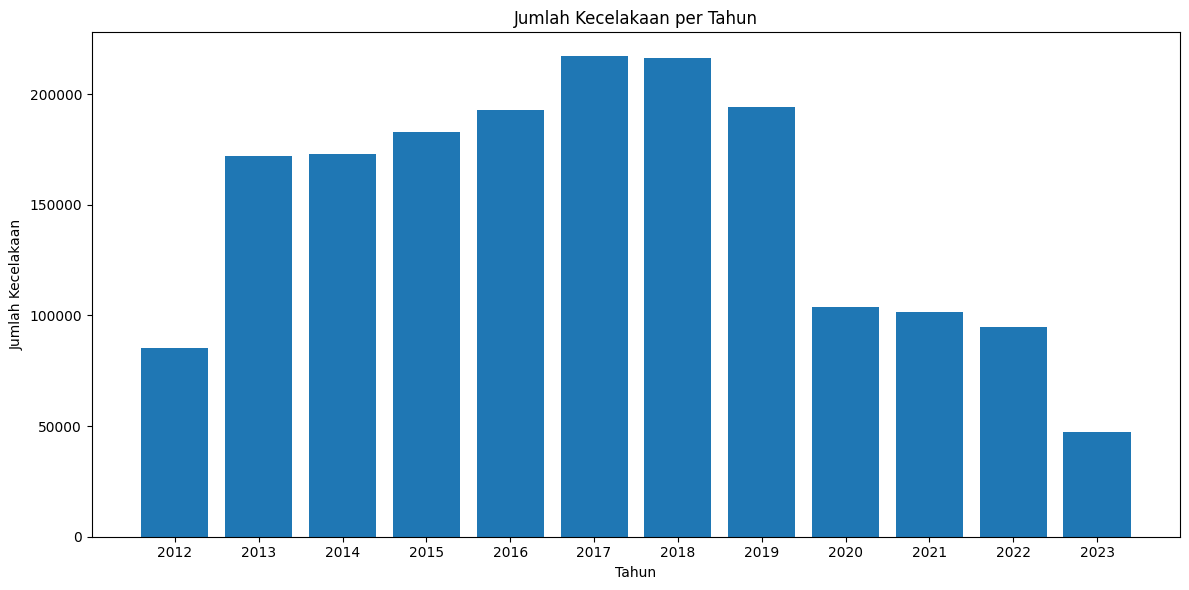

In [60]:
from pyspark.sql.functions import to_date, year
import matplotlib.pyplot as plt

# Ubah CRASH DATE menjadi tipe tanggal
df = df.withColumn("CRASH_DATE", to_date("CRASH DATE", "MM/dd/yyyy"))

# Ambil tahun
df_year = df.withColumn("YEAR", year("CRASH_DATE"))

# Hitung jumlah kecelakaan per tahun
accident_by_year = (
    df_year.groupBy("YEAR")
           .count()
           .orderBy("YEAR")
)

# Ubah ke Pandas
pdf = accident_by_year.toPandas()

# Visualisasi Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(pdf["YEAR"], pdf["count"])

plt.title("Jumlah Kecelakaan per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kecelakaan")
plt.xticks(pdf["YEAR"])

plt.tight_layout()
plt.show()

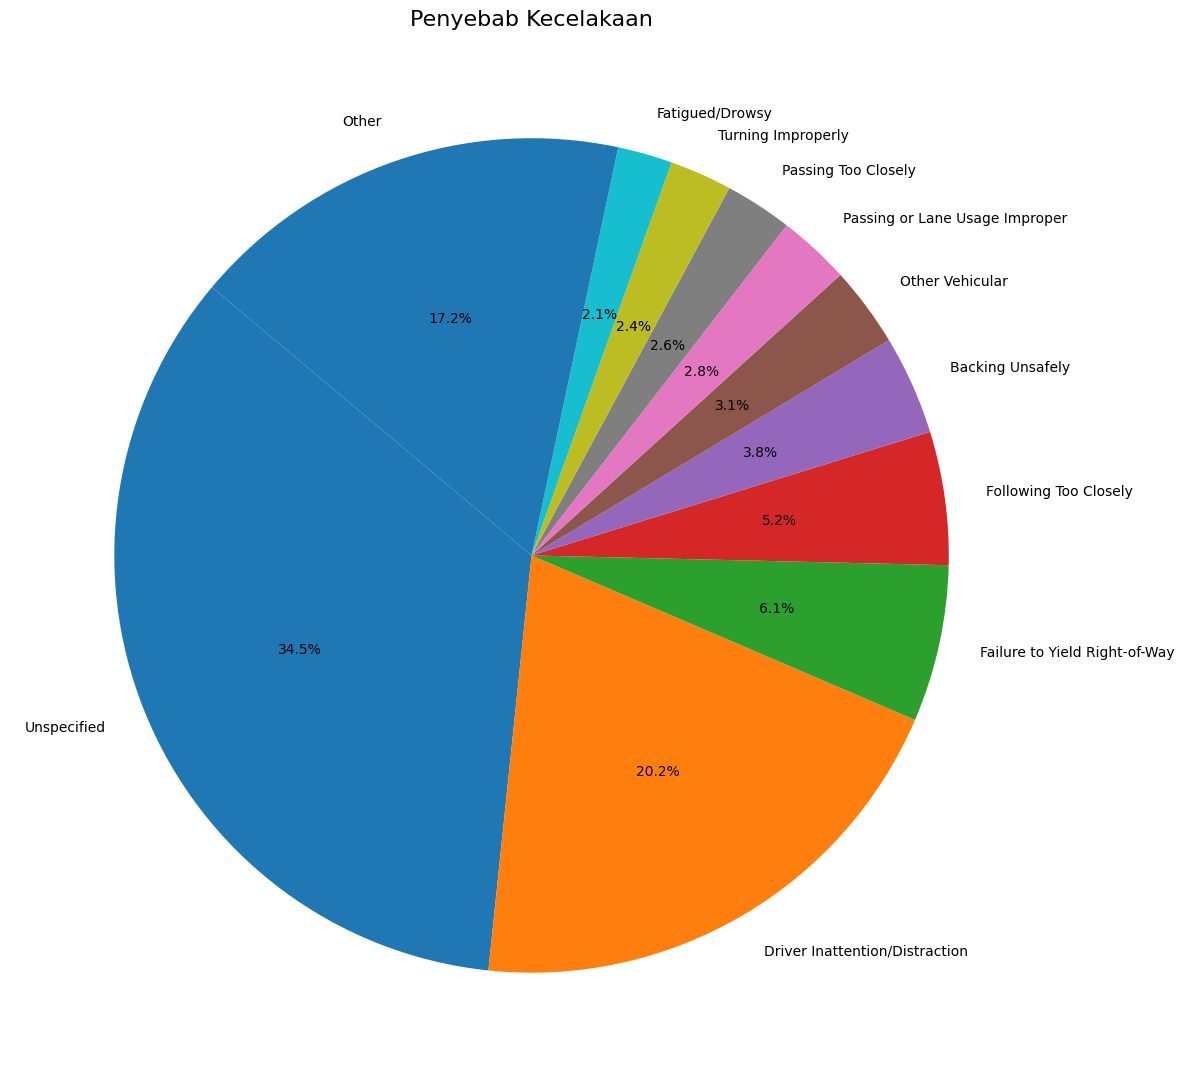

In [61]:
from pyspark.sql.functions import col, sum as spark_sum
import matplotlib.pyplot as plt

# Hitung jumlah kejadian per penyebab kecelakaan
cause_df = (
    df.groupBy("CONTRIBUTING FACTOR VEHICLE 1")
      .count()
      .orderBy("count", ascending=False)
)

# Ambil 10 penyebab terbesar/terbanyak
top10_df = cause_df.limit(10)

# Hitung jumlah selain 10 terbesar
top10_list = [row["CONTRIBUTING FACTOR VEHICLE 1"] for row in top10_df.collect()]

other_df = (
    cause_df.filter(~col("CONTRIBUTING FACTOR VEHICLE 1").isin(top10_list))
            .agg(spark_sum("count").alias("count"))
)

# Konversi ke Pandas
top10_pd = top10_df.toPandas()
other_pd = other_df.toPandas()

# Membuat kategori selain 10 besar menjadi kategori "Other"
top10_pd.loc[len(top10_pd)] = ["Other", other_pd["count"].iloc[0]]

# Visualisasi Pie Chart
plt.figure(figsize=(12, 12))
plt.pie(
    top10_pd["count"],
    labels=top10_pd["CONTRIBUTING FACTOR VEHICLE 1"],
    autopct="%1.1f%%",
    startangle=140
)

plt.title("Penyebab Kecelakaan", fontsize=16)
plt.tight_layout()
plt.show()

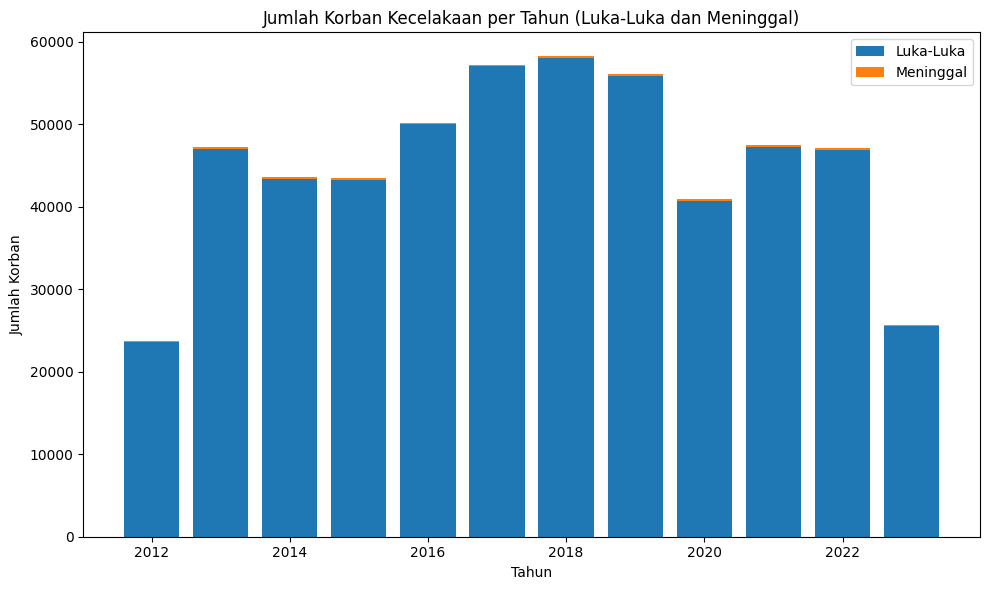

In [62]:
from pyspark.sql.functions import year, to_timestamp, sum as spark_sum
import matplotlib.pyplot as plt
import pandas as pd

df_year = df.withColumn("YEAR", year(to_timestamp("CRASH DATE", "MM/dd/yyyy")))

# Hitung total korban selamat & meninggal per tahun
yearly_df = df_year.groupBy("YEAR").agg(
    spark_sum("NUMBER OF PERSONS INJURED").alias("INJURED"),
    spark_sum("NUMBER OF PERSONS KILLED").alias("KILLED")
).orderBy("YEAR")

# Ubah ke Pandas untuk visualisasi
yearly_pd = yearly_df.toPandas()

# Plot stacked bar chart
plt.figure(figsize=(10, 6))

plt.bar(yearly_pd["YEAR"], yearly_pd["INJURED"], label="Luka-Luka")
plt.bar(yearly_pd["YEAR"], yearly_pd["KILLED"], bottom=yearly_pd["INJURED"], label="Meninggal")

plt.title("Jumlah Korban Kecelakaan per Tahun (Luka-Luka dan Meninggal)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Korban")
plt.legend()

plt.tight_layout()
plt.show()

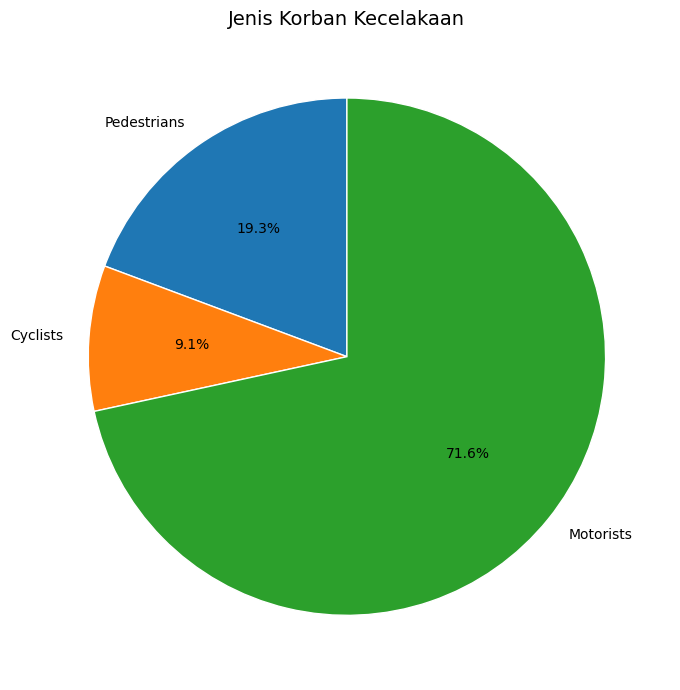

In [63]:
from pyspark.sql.functions import sum as spark_sum
import matplotlib.pyplot as plt
import pandas as pd

# Hitung total korban per kategori
victim_df = df.select(
    spark_sum("NUMBER OF PEDESTRIANS INJURED").alias("PEDESTRIANS"),
    spark_sum("NUMBER OF CYCLIST INJURED").alias("CYCLISTS"),
    spark_sum("NUMBER OF MOTORIST INJURED").alias("MOTORISTS")
)

# Konversi ke Pandas
victim_pd = victim_df.toPandas()

# Buat DataFrame kategori dan jumlah untuk pie chart
labels = ["Pedestrians", "Cyclists", "Motorists"]
sizes = [
    victim_pd["PEDESTRIANS"][0],
    victim_pd["CYCLISTS"][0],
    victim_pd["MOTORISTS"][0]
]

# Plot Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Jenis Korban Kecelakaan", fontsize=14)
plt.tight_layout()
plt.show()

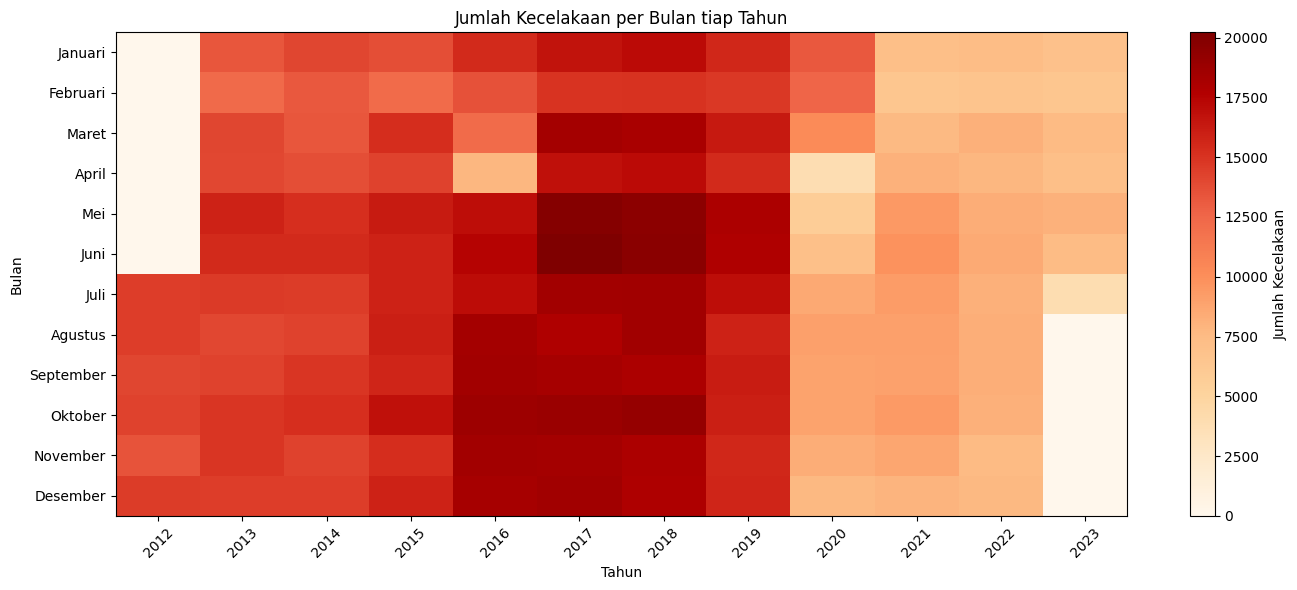

In [64]:
from pyspark.sql.functions import to_timestamp, month, year, count
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df2 = df.withColumn("DATE_TS", to_timestamp("CRASH DATE", "MM/dd/yyyy"))

# Ambil nilai bulan dan tahun
df2 = df2.withColumn("MONTH", month("DATE_TS"))
df2 = df2.withColumn("YEAR", year("DATE_TS"))

# itung jumlah kecelakaan berdasarkan bulan dan tahun
my_df = df2.groupBy("YEAR", "MONTH").agg(
    count("*").alias("TOTAL_CRASH")
).orderBy("YEAR", "MONTH")

# Ubah ke Pandas
my_pd = my_df.toPandas()

# Pivot: index = bulan (1–12), kolom = tahun
heatmap_data = my_pd.pivot(index="MONTH", columns="YEAR", values="TOTAL_CRASH")

# Mengisi nilai kosong
heatmap_data = heatmap_data.fillna(0)

# Nama bulan
bulan_names = [
    "Januari", "Februari", "Maret", "April", "Mei", "Juni",
    "Juli", "Agustus", "September", "Oktober", "November", "Desember"
]

# Plot heatmap
plt.figure(figsize=(14, 6))
plt.imshow(heatmap_data, aspect='auto', cmap="OrRd")

plt.colorbar(label="Jumlah Kecelakaan")

# Label axis
plt.xlabel("Tahun")
plt.ylabel("Bulan")

# X (tahun)
plt.xticks(
    ticks=np.arange(len(heatmap_data.columns)),
    labels=heatmap_data.columns.astype(int),
    rotation=45
)

# Y (bulan)
plt.yticks(
    ticks=np.arange(12),
    labels=bulan_names
)

plt.title("Jumlah Kecelakaan per Bulan tiap Tahun")
plt.tight_layout()
plt.show()

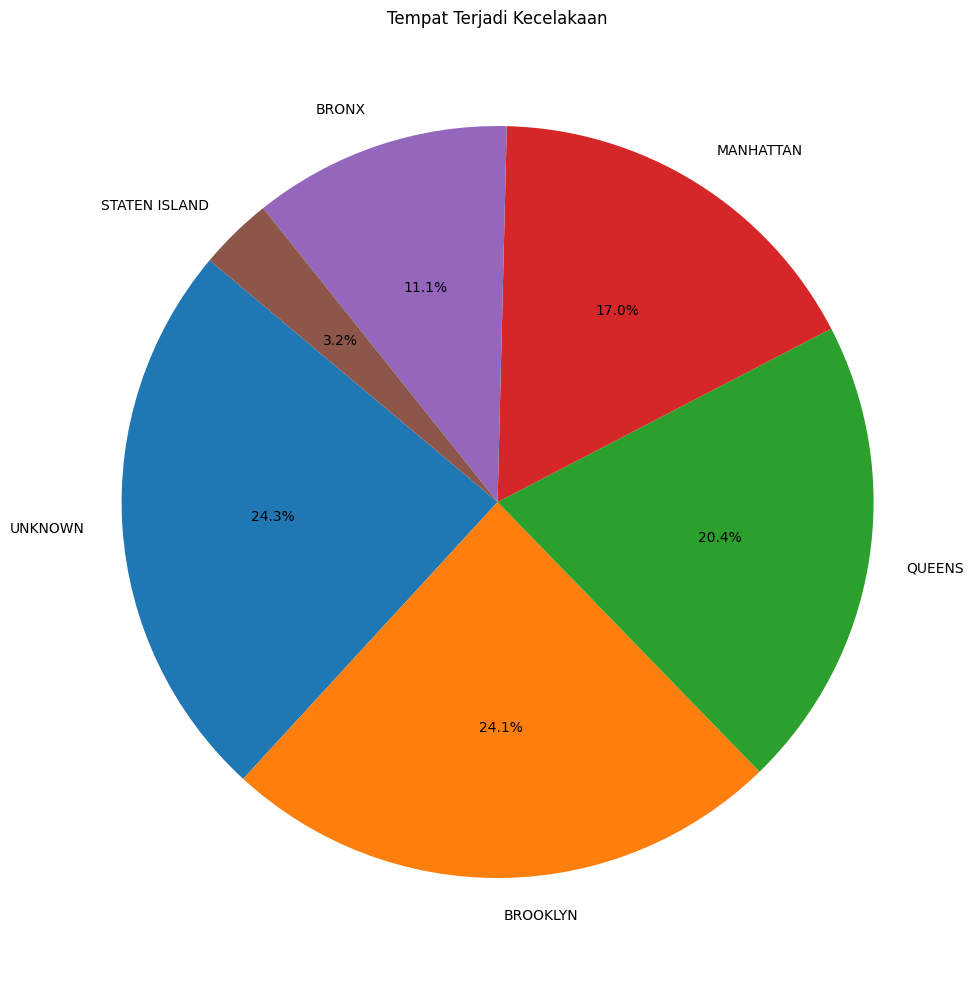

In [65]:
from pyspark.sql.functions import col, count
import matplotlib.pyplot as plt

# Hitung jumlah kecelakaan per BOROUGH
borough_df = (
    df.groupBy("BOROUGH")
      .agg(count("*").alias("count"))
      .orderBy("count", ascending=False)
)

# Ubah ke Pandas
top_pd = borough_df.toPandas()

# Plot Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(
    top_pd["count"],
    labels=top_pd["BOROUGH"],
    autopct="%1.1f%%",
    startangle=140
)

plt.title("Tempat Terjadi Kecelakaan")
plt.tight_layout()
plt.show()

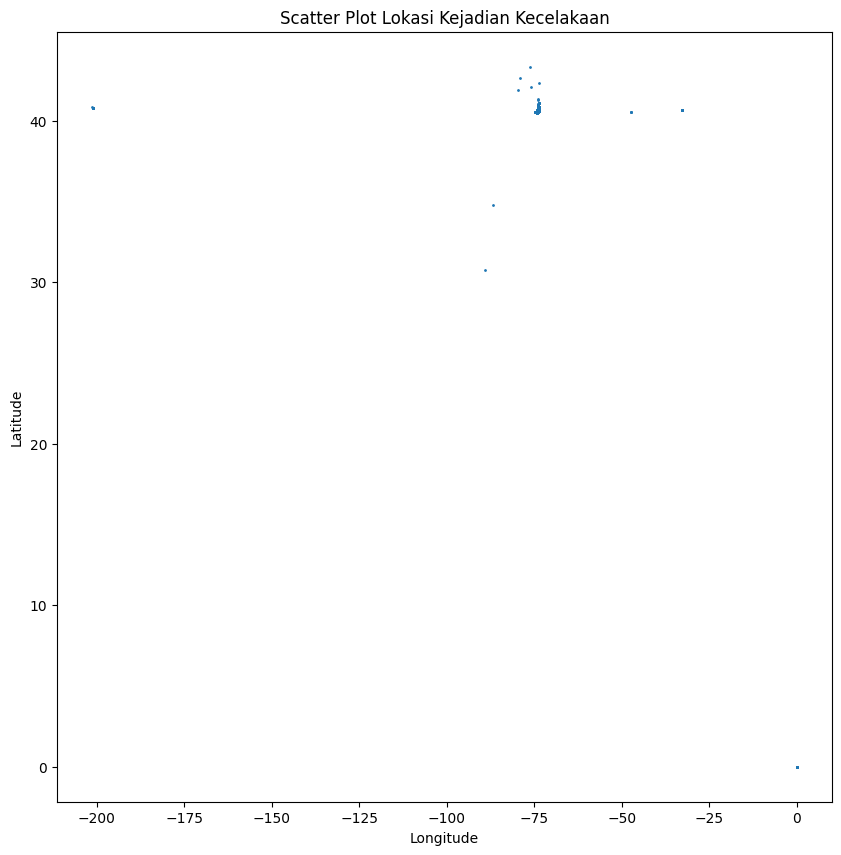

In [66]:
# Ambil latitude dan longitude yang tidak kosong
loc_df = df.filter(
    (col("LATITUDE").isNotNull()) & 
    (col("LONGITUDE").isNotNull())
)

# Konversi ke Pandas
loc_pd = loc_df.select("LATITUDE", "LONGITUDE").toPandas()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(loc_pd["LONGITUDE"], loc_pd["LATITUDE"], s=1)

plt.title("Scatter Plot Lokasi Kejadian Kecelakaan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

In [67]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline

# Encode BOROUGH
borough_indexer = StringIndexer(
    inputCol="BOROUGH",
    outputCol="borough_index"
)

# Menggabungkan BOROUGH + LOCATION
assembler = VectorAssembler(
    inputCols=["borough_index", "latitude", "longitude"],
    outputCol="features"
)

# K-MEANS
kmeans = KMeans(
    k=5,        
    seed=42,
    featuresCol="features",
    predictionCol="cluster"
)

# Pipeline
pipeline = Pipeline(stages=[borough_indexer, assembler, kmeans])

# Melatih model
model = pipeline.fit(df)

# Melakukan clustering
clustered_df = model.transform(df)

# Output
clustered_df.select("BOROUGH", "latitude", "longitude", "cluster").show(20, truncate=False)

+-------------+---------+----------+-------+
|BOROUGH      |latitude |longitude |cluster|
+-------------+---------+----------+-------+
|BROOKLYN     |40.667202|-73.8665  |0      |
|BROOKLYN     |40.683304|-73.917274|0      |
|UNKNOWN      |40.709183|-73.956825|4      |
|BRONX        |40.86816 |-73.83148 |3      |
|BROOKLYN     |40.67172 |-73.8971  |0      |
|MANHATTAN    |40.75144 |-73.97397 |3      |
|UNKNOWN      |40.701275|-73.88887 |4      |
|QUEENS       |40.675884|-73.75577 |0      |
|UNKNOWN      |40.59662 |-74.00231 |4      |
|QUEENS       |40.66684 |-73.78941 |0      |
|BROOKLYN     |40.68158 |-73.97463 |0      |
|BROOKLYN     |40.65068 |-73.95881 |0      |
|BRONX        |40.87262 |-73.904686|3      |
|UNKNOWN      |40.783268|-73.82485 |4      |
|MANHATTAN    |40.748917|-73.993546|3      |
|UNKNOWN      |40.744644|-73.77041 |4      |
|QUEENS       |40.75373 |-73.88505 |0      |
|UNKNOWN      |40.804375|-73.93742 |4      |
|STATEN ISLAND|40.63165 |-74.08762 |3      |
|BROOKLYN 

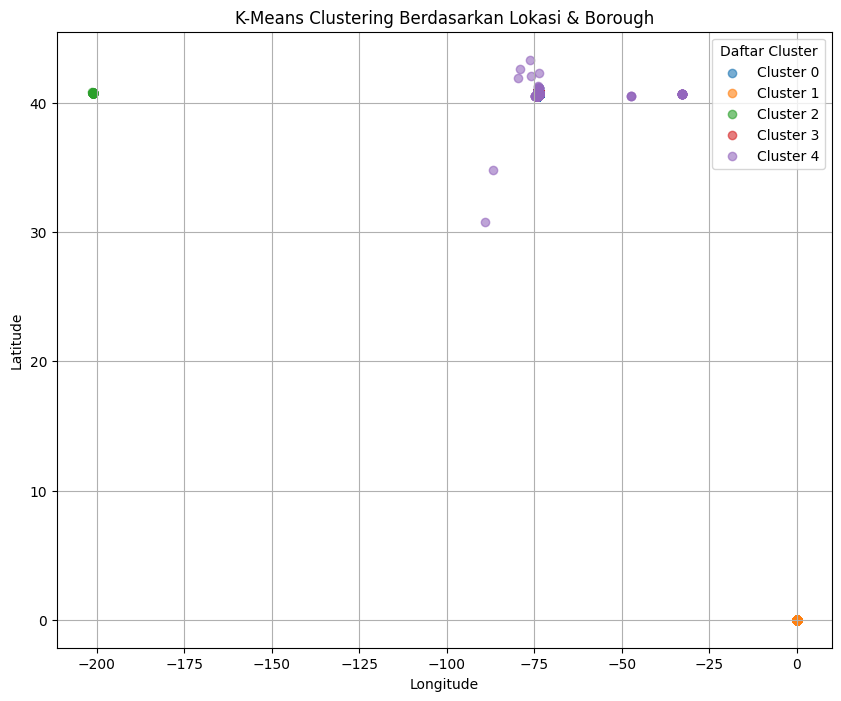

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi ke Pandas
pdf = clustered_df.select("latitude", "longitude", "cluster").toPandas()

# Plot
plt.figure(figsize=(10, 8))

# Scatter plot per cluster
clusters = sorted(pdf["cluster"].unique())

for cl in clusters:
    subset = pdf[pdf["cluster"] == cl]
    plt.scatter(
        subset["longitude"],
        subset["latitude"],
        label=f"Cluster {cl}",
        alpha=0.6
    )

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clustering Berdasarkan Lokasi & Borough")
plt.grid(True)
plt.legend(title="Daftar Cluster")
plt.show()

In [71]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
from pyspark.sql.functions import dayofmonth, month, to_date

# Ubah CRASH DATE ke tipe tanggal
df = df.withColumn("crash_date_ts", to_date("CRASH DATE", "MM/dd/yyyy"))

# Ekstrak hari dan bulan
df = df.withColumn("day", dayofmonth("crash_date_ts"))
df = df.withColumn("month", month("crash_date_ts"))

# VectorAssembler dengan fitur hari dan bulan
assembler = VectorAssembler(
    inputCols=["day", "month"],
    outputCol="features"
)

# KMeans
kmeans = KMeans(
    k=5,
    seed=42,
    featuresCol="features",
    predictionCol="cluster"
)

# Pipeline
pipeline = Pipeline(stages=[assembler, kmeans])

# Latih model
model = pipeline.fit(df)

# Clustering
clustered_df = model.transform(df)

# Output
clustered_df.select("CRASH DATE", "day", "month", "cluster").show(20, truncate=False)

+----------+---+-----+-------+
|CRASH DATE|day|month|cluster|
+----------+---+-----+-------+
|09/11/2021|11 |9    |1      |
|12/14/2021|14 |12   |1      |
|12/14/2021|14 |12   |1      |
|12/14/2021|14 |12   |1      |
|12/14/2021|14 |12   |1      |
|12/14/2021|14 |12   |1      |
|12/13/2021|13 |12   |1      |
|12/14/2021|14 |12   |1      |
|12/14/2021|14 |12   |1      |
|12/14/2021|14 |12   |1      |
|12/14/2021|14 |12   |1      |
|12/14/2021|14 |12   |1      |
|12/11/2021|11 |12   |2      |
|12/14/2021|14 |12   |1      |
|12/11/2021|11 |12   |2      |
|12/14/2021|14 |12   |1      |
|12/13/2021|13 |12   |1      |
|12/14/2021|14 |12   |1      |
|12/13/2021|13 |12   |1      |
|12/14/2021|14 |12   |1      |
+----------+---+-----+-------+
only showing top 20 rows


/home/hanif/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


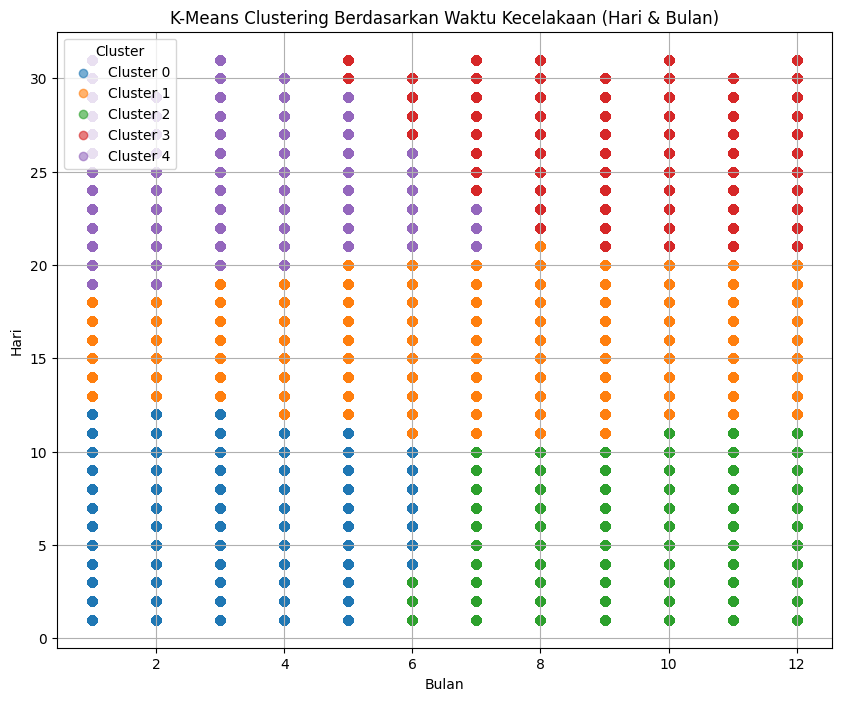

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi ke Pandas
pdf = clustered_df.select("day", "month", "cluster").toPandas()

# Plot
plt.figure(figsize=(10, 8))

# Scatter plot per cluster
clusters = sorted(pdf["cluster"].unique())

for cl in clusters:
    subset = pdf[pdf["cluster"] == cl]
    plt.scatter(
        subset["month"],  # x = bulan
        subset["day"],    # y = hari
        label=f"Cluster {cl}",
        alpha=0.6
    )

plt.xlabel("Bulan")
plt.ylabel("Hari")
plt.title("K-Means Clustering Berdasarkan Waktu Kecelakaan (Hari & Bulan)")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()

In [81]:
from pyspark.sql.functions import to_date, count, unix_date
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# 1. Konversi ke tipe DATE
df = df.withColumn("crash_date_ts", to_date("CRASH DATE", "MM/dd/yyyy"))

# 2. Hitung jumlah kecelakaan per hari
daily_df = df.groupBy("crash_date_ts").agg(count("*").alias("total_accidents"))

# 3. Ubah tanggal menjadi angka (days since epoch)
daily_df = daily_df.withColumn("date_int", unix_date("crash_date_ts"))

# 4. VectorAssembler untuk fitur
assembler = VectorAssembler(
    inputCols=["date_int"],
    outputCol="features"
)

# 5. Linear Regression
lr = LinearRegression(
    featuresCol="features",
    labelCol="total_accidents",
    predictionCol="prediction"
)

# 6. Pipeline
pipeline = Pipeline(stages=[assembler, lr])

# 7. Split train/test
train_df, test_df = daily_df.randomSplit([0.8, 0.2], seed=42)

# 8. Latih model
model = pipeline.fit(train_df)

# 9. Prediksi
predictions = model.transform(test_df)

# 10. Tampilkan hasil
predictions.select("crash_date_ts", "total_accidents", "prediction").show(20, truncate=False)

# 11. Evaluasi
evaluator = RegressionEvaluator(
    labelCol="total_accidents",
    predictionCol="prediction",
    metricName="rmse"
)

rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) = {rmse:.2f}")

25/11/26 18:01:57 WARN Instrumentation: [bb6e5df0] regParam is zero, which might cause numerical instability and overfitting.
                                                                                

+-------------+---------------+-----------------+
|crash_date_ts|total_accidents|prediction       |
+-------------+---------------+-----------------+
|2012-07-03   |583            |574.4045441675139|
|2012-07-07   |422            |574.1361795898154|
|2012-07-09   |446            |574.0019973009662|
|2012-07-14   |448            |573.666541578843 |
|2012-07-20   |525            |573.2639947122952|
|2012-07-24   |486            |572.9956301345967|
|2012-07-30   |463            |572.5930832680488|
|2012-08-05   |431            |572.190536401501 |
|2012-08-15   |507            |571.5196249572546|
|2012-08-16   |518            |571.4525338128299|
|2012-08-17   |480            |571.3854426684054|
|2012-08-19   |404            |571.251260379556 |
|2012-08-21   |408            |571.1170780907069|
|2012-08-25   |408            |570.8487135130083|
|2012-09-01   |432            |570.3790755020357|
|2012-09-08   |510            |569.9094374910633|
|2012-09-16   |379            |569.3727083356662|


[Stage 1606:==============>                                         (1 + 3) / 4]

Root Mean Squared Error (RMSE) = 132.14


In [ ]:
import matplotlib.pyplot as plt

# Konversi ke Pandas
pdf = predictions.select("crash_date_ts", "total_accidents", "prediction").orderBy("crash_date_ts").toPandas()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(pdf["crash_date_ts"], pdf["total_accidents"], label="Aktual", marker='o', linestyle='-', alpha=0.7)
plt.plot(pdf["crash_date_ts"], pdf["prediction"], label="Prediksi", marker='.', linestyle='--', alpha=0.7)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kecelakaan")
plt.title("Prediksi Jumlah Kecelakaan per Hari (Linear Regression)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

[Stage 1654:>                                                       (0 + 4) / 4]

+-------------+---------------+-----------------+
|crash_date_ts|total_accidents|prediction       |
+-------------+---------------+-----------------+
|2012-07-03   |583            |462.7374284367508|
|2012-07-07   |422            |462.7374284367508|
|2012-07-09   |446            |462.7374284367508|
|2012-07-14   |448            |462.7374284367508|
|2012-07-20   |525            |462.7374284367508|
|2012-07-24   |486            |462.7374284367508|
|2012-07-30   |463            |462.7374284367508|
|2012-08-05   |431            |462.7374284367508|
|2012-08-15   |507            |462.7374284367508|
|2012-08-16   |518            |462.7374284367508|
|2012-08-17   |480            |462.7374284367508|
|2012-08-19   |404            |462.7374284367508|
|2012-08-21   |408            |462.7374284367508|
|2012-08-25   |408            |462.7374284367508|
|2012-09-01   |432            |462.7374284367508|
|2012-09-08   |510            |462.7374284367508|
|2012-09-16   |379            |462.7374284367508|


Root Mean Squared Error (RMSE) = 80.27


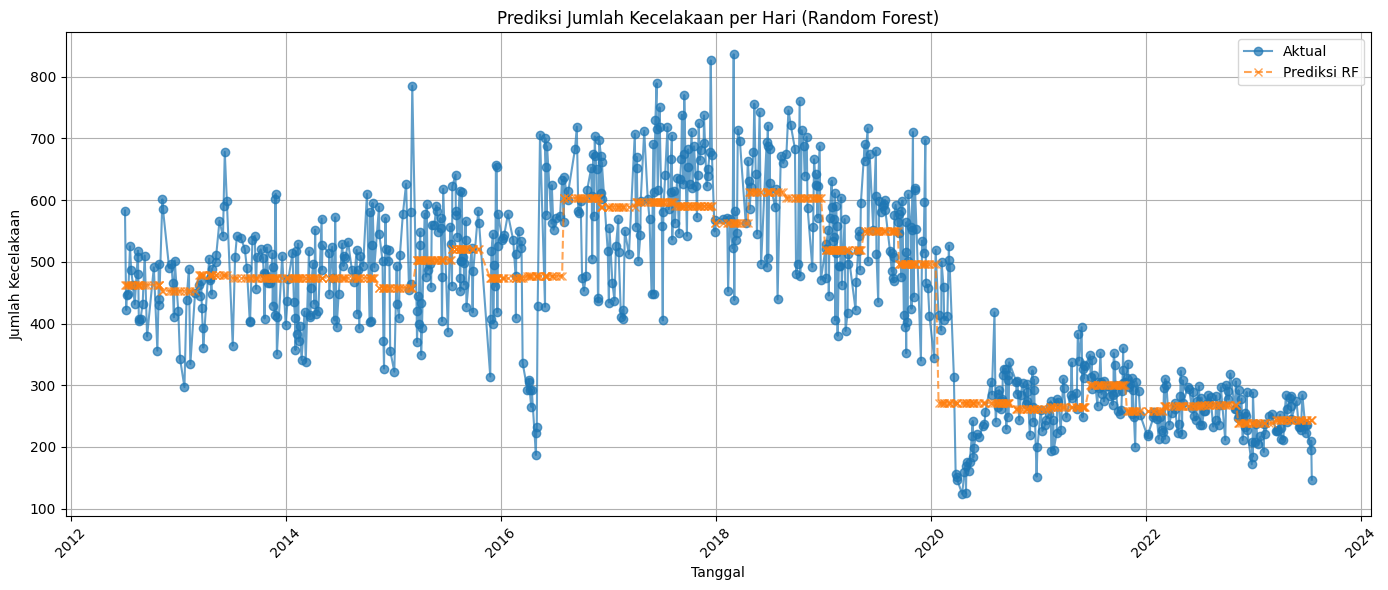

In [83]:
from pyspark.sql.functions import to_date, count, unix_date
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt

# 1. Konversi ke tipe DATE
df = df.withColumn("crash_date_ts", to_date("CRASH DATE", "MM/dd/yyyy"))

# 2. Hitung jumlah kecelakaan per hari
daily_df = df.groupBy("crash_date_ts").agg(count("*").alias("total_accidents"))

# 3. Ubah tanggal menjadi angka (days since epoch)
daily_df = daily_df.withColumn("date_int", unix_date("crash_date_ts"))

# 4. VectorAssembler untuk fitur
assembler = VectorAssembler(
    inputCols=["date_int"],
    outputCol="features"
)

# 5. Random Forest Regressor
rf = RandomForestRegressor(
    featuresCol="features",
    labelCol="total_accidents",
    predictionCol="prediction",
    numTrees=100,
    maxDepth=5,
    seed=42
)

# 6. Pipeline
pipeline = Pipeline(stages=[assembler, rf])

# 7. Split train/test
train_df, test_df = daily_df.randomSplit([0.8, 0.2], seed=42)

# 8. Latih model
model = pipeline.fit(train_df)

# 9. Prediksi
predictions = model.transform(test_df)

# 10. Tampilkan hasil
predictions.select("crash_date_ts", "total_accidents", "prediction").show(20, truncate=False)

# 11. Evaluasi
evaluator = RegressionEvaluator(
    labelCol="total_accidents",
    predictionCol="prediction",
    metricName="rmse"
)
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) = {rmse:.2f}")

# Visualisasi
pdf = predictions.select("crash_date_ts", "total_accidents", "prediction").orderBy("crash_date_ts").toPandas()

plt.figure(figsize=(14, 6))
plt.plot(pdf["crash_date_ts"], pdf["total_accidents"], label="Aktual", marker='o', linestyle='-', alpha=0.7)
plt.plot(pdf["crash_date_ts"], pdf["prediction"], label="Prediksi RF", marker='x', linestyle='--', alpha=0.7)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kecelakaan")
plt.title("Prediksi Jumlah Kecelakaan per Hari (Random Forest)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()